In [35]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

from pprint import pprint

import pandas_profiling

from sklearn.linear_model import LinearRegression

In [36]:
#import the data
directory = 'C:/githubrepo/7331_Project/data/'
df = pd.read_csv(directory + 'Diabetic_Cleaned.csv')
df_imputed = df
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
number_diagnoses            101766 non-null int64
max_glu_serum               101766 

In [37]:
#10 age groups; Ordinal encoding
#feature density plot of age can help with answering the question like: does people older age tend to be readmitted?
#can use map/apply function to achieve this

df_imputed.age[df_imputed.age== '[0-10)'] = 1
df_imputed.age[df_imputed.age== '[10-20)'] = 2
df_imputed.age[df_imputed.age== '[20-30)'] = 3
df_imputed.age[df_imputed.age== '[30-40)'] = 4
df_imputed.age[df_imputed.age== '[40-50)'] = 5
df_imputed.age[df_imputed.age== '[50-60)'] = 6
df_imputed.age[df_imputed.age== '[60-70)'] = 7
df_imputed.age[df_imputed.age== '[70-80)'] = 8
df_imputed.age[df_imputed.age== '[80-90)'] = 9
df_imputed.age[df_imputed.age== '[90-100)'] = 10

df_imputed["age"] = df_imputed["age"].astype(int)

In [38]:
dummiesList=["discharge_disposition","admission_source", "admission_type"]
    
df_imputed_min_wDummies = pd.get_dummies(df_imputed[dummiesList])

In [44]:
NumFeatures= ["age","num_medications", "number_diagnoses",
       "number_emergency", "num_lab_procedures", "number_inpatient", "medication_count", "readmitted_tf", "time_in_hospital"]

df_NumFeatures=df_imputed[NumFeatures]


df_imputed_min_wDummies= pd.concat((df_imputed_min_wDummies, df_imputed[NumFeatures]), axis=1)

In [40]:
df_imputed_min_wDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 56 columns):
discharge_disposition_Admitted as an inpatient to this hospital                                                                    101766 non-null uint8
discharge_disposition_Discharged to home                                                                                           101766 non-null uint8
discharge_disposition_Discharged/transferred to ICF                                                                                101766 non-null uint8
discharge_disposition_Discharged/transferred to SNF                                                                                101766 non-null uint8
discharge_disposition_Discharged/transferred to a federal health care facility.                                                    101766 non-null uint8
discharge_disposition_Discharged/transferred to a long term care hospital.                                                  

In [41]:
#Simple Statistics
df_imputed_min_wDummies.describe()

,discharge_disposition_Admitted as an inpatient to this hospital,discharge_disposition_Discharged to home,discharge_disposition_Discharged/transferred to ICF,discharge_disposition_Discharged/transferred to SNF,discharge_disposition_Discharged/transferred to a federal health care facility.,discharge_disposition_Discharged/transferred to a long term care hospital.,discharge_disposition_Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.,discharge_disposition_Discharged/transferred to another rehab fac including rehab units of a hospital.,discharge_disposition_Discharged/transferred to another short term hospital,discharge_disposition_Discharged/transferred to another type of inpatient care institution,...,age,num_medications,number_diagnoses,time_in_hospital,number_emergency,num_lab_procedures,number_inpatient,medication_count,readmitted_tf,time_in_hospital
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,...,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,0.003331,0.549958,0.010878,0.124678,0.000049,0.032722,0.000403,0.014818,0.021569,0.014258,...,7.096702,16.560492,7.422607,4.589696,0.212232,34.047383,0.635566,1.178616,0.460881,4.589696
std,0.057620,0.497500,0.103729,0.330355,0.007009,0.177909,0.020068,0.120826,0.145272,0.118554,...,1.594084,9.105980,1.933600,3.160314,0.917842,22.386944,1.262863,0.924977,0.498470,3.160314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,10.000000,6.000000,2.000000,0.000000,16.000000,0.000000,1.000000,0.000000,2.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,15.000000,8.000000,4.000000,0.000000,30.000000,0.000000,1.000000,0.000000,4.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,20.000000,9.000000,6.000000,0.000000,49.000000,1.000000,2.000000,1.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,10.000000,81.000000,16.000000,14.000000,76.000000,129.000000,21.000000,6.000000,1.000000,14.000000


In [46]:
import pandas_profiling
pandas_profiling.ProfileReport(df_NumFeatures)


AttributeError: 'DataFrame' object has no attribute 'name'

In [45]:
#df_imputed_min_wDummies.columns
df_NumFeatures.columns

Index(['age', 'num_medications', 'number_diagnoses', 'number_emergency',
       'num_lab_procedures', 'number_inpatient', 'medication_count',
       'readmitted_tf', 'time_in_hospital'],
      dtype='object')

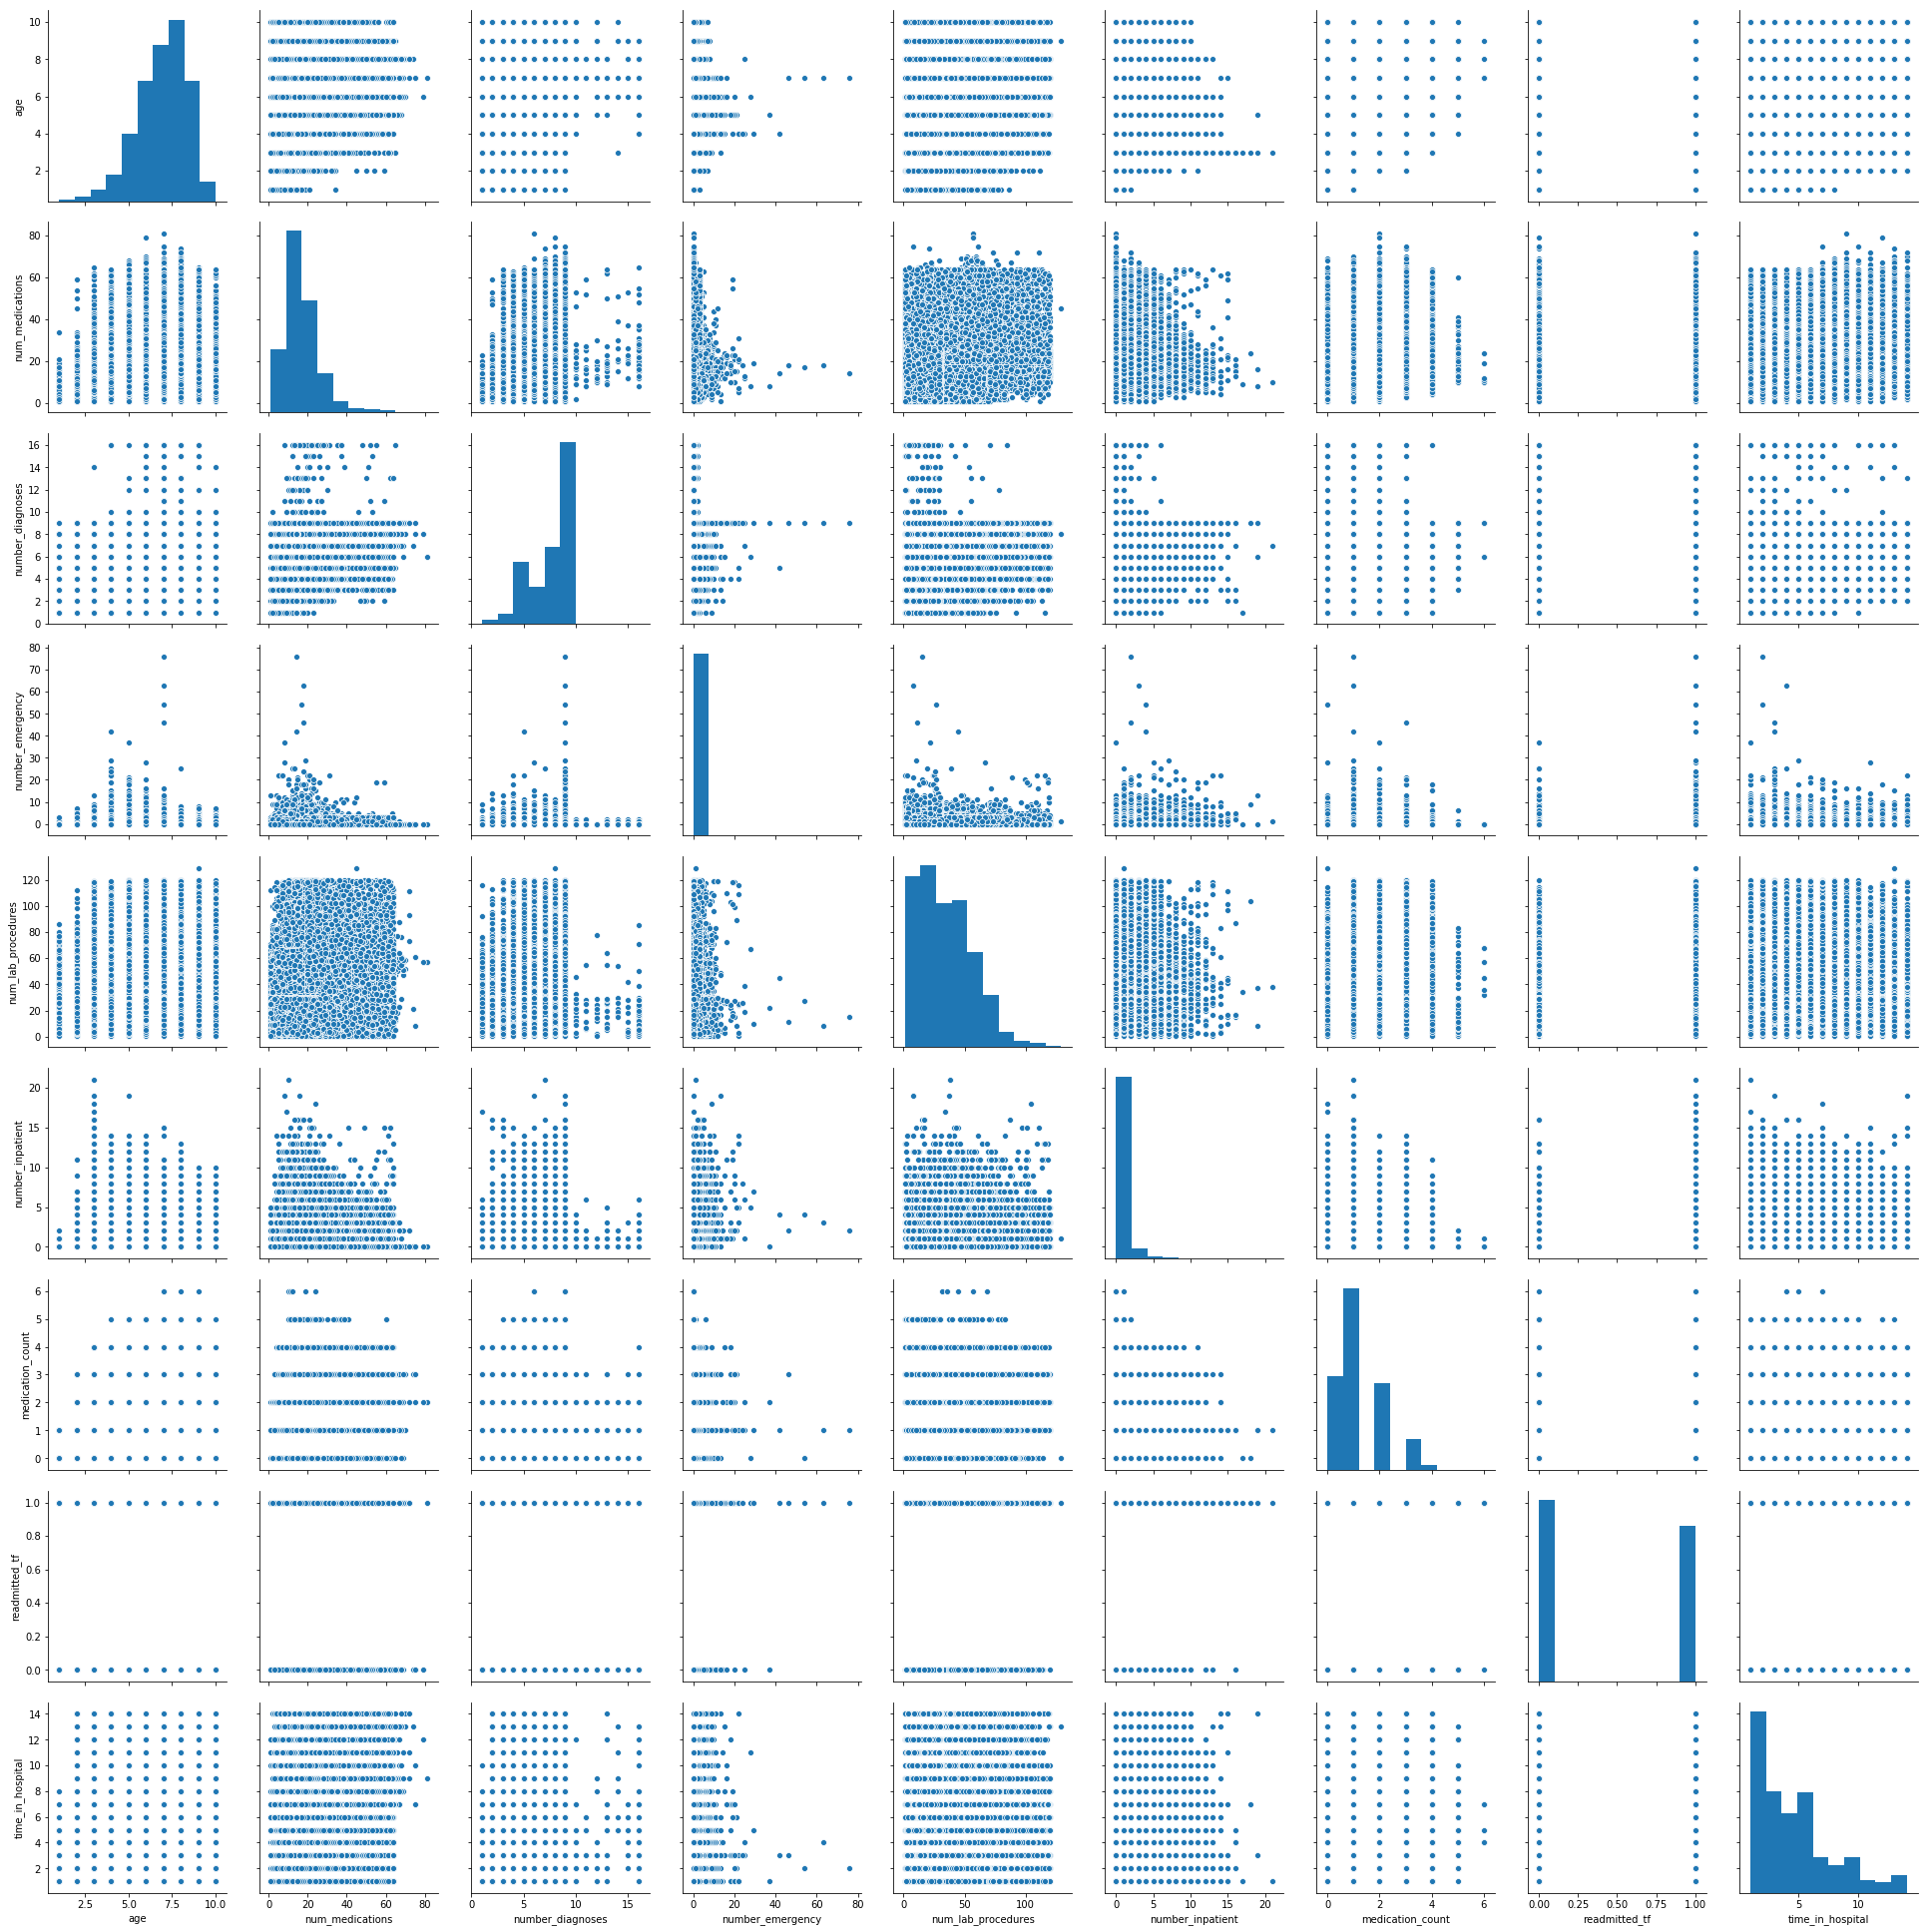

In [46]:

#sns.pairplot
sns.pairplot(df_NumFeatures, size=3)

In [51]:
df_NumFeatures.corr()["time_in_hospital"]

age                   0.102467
num_medications       0.372413
number_diagnoses      0.214656
number_emergency      0.005250
num_lab_procedures    0.192700
number_inpatient      0.095305
medication_count      0.073259
readmitted_tf         0.114739
time_in_hospital      1.000000
Name: time_in_hospital, dtype: float64

In [11]:
df=df_imputed_min_wDummies
df.head()

,discharge_disposition_Admitted as an inpatient to this hospital,discharge_disposition_Discharged to home,discharge_disposition_Discharged/transferred to ICF,discharge_disposition_Discharged/transferred to SNF,discharge_disposition_Discharged/transferred to a federal health care facility.,discharge_disposition_Discharged/transferred to a long term care hospital.,discharge_disposition_Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.,discharge_disposition_Discharged/transferred to another rehab fac including rehab units of a hospital.,discharge_disposition_Discharged/transferred to another short term hospital,discharge_disposition_Discharged/transferred to another type of inpatient care institution,...,age,num_medications,number_diagnoses,time_in_hospital,number_emergency,num_lab_procedures,number_inpatient,medication_count,readmitted_tf,time_in_hospital
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,41,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,2,18,9,3,0,59,0,1,1,3
2,0,1,0,0,0,0,0,0,0,0,...,3,13,6,2,0,11,1,1,0,2
3,0,1,0,0,0,0,0,0,0,0,...,4,16,7,2,0,44,0,1,0,2
4,0,1,0,0,0,0,0,0,0,0,...,5,8,5,1,0,51,0,2,0,1


In [29]:
## Code to train a model and calc the R-sq 
## This iece of code trains a RandomForest Regressor 
if "time_in_hospital" in df.columns:
    yData = df.time_in_hospital
    del df["time_in_hospital"]
xData = df
X_train, X_test, y_train, y_test = train_test_split(xData,yData)

In [30]:
    # we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()

scl_obj.fit(X_train)
X_test_scaled = scl_obj.transform(X_test)

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

C:\ProgramData\Anaconda3\envs\DS7331_35r\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\envs\DS7331_35r\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\envs\DS7331_35r\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\envs\DS7331_35r\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [31]:
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()

linearRegressor.fit(X_train_scaled , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
yPrediction = linearRegressor.predict(X_test_scaled)

In [33]:
linearRegressor.coef_[0].T

array([-1.87452443e-01, -5.18912475e-01, -9.44645853e-02,  1.66495085e-01,
        2.24463061e-02,  2.54150966e-01, -2.15310877e-02,  5.89759317e-02,
       -2.19230749e-01, -4.30439613e-02, -1.52147452e-01,  3.68280961e-02,
        1.67317531e-02,  9.49332512e-03, -2.56547839e-02,  3.18695099e-02,
       -8.44934476e-02, -3.01132207e-02, -5.97499459e-03,  5.52860635e-02,
        3.24380893e-02,  2.00810865e-01, -7.75932330e-03, -7.87721191e-02,
       -1.19941784e-02,  2.16144122e-01,  1.66519042e-02,  2.82721172e-01,
        2.75667195e-04,  1.37393474e-02,  3.65541212e-03,  4.64005677e-03,
        2.65451288e-01,  2.44222189e-01,  5.25799861e-02,  3.77554852e-01,
        2.76967280e-01,  2.33937338e-01,  2.90383618e-02, -4.30651479e-01,
       -2.37046020e-01, -3.95892642e-01, -1.49546742e-01, -6.03594027e-02,
       -1.73249991e-01, -9.25578268e-02,  1.03404083e-02,  9.87941926e-01,
        3.72168278e-01, -1.08907147e-01,  1.54162480e-01,  8.73570845e-02,
        1.02386787e-02, -

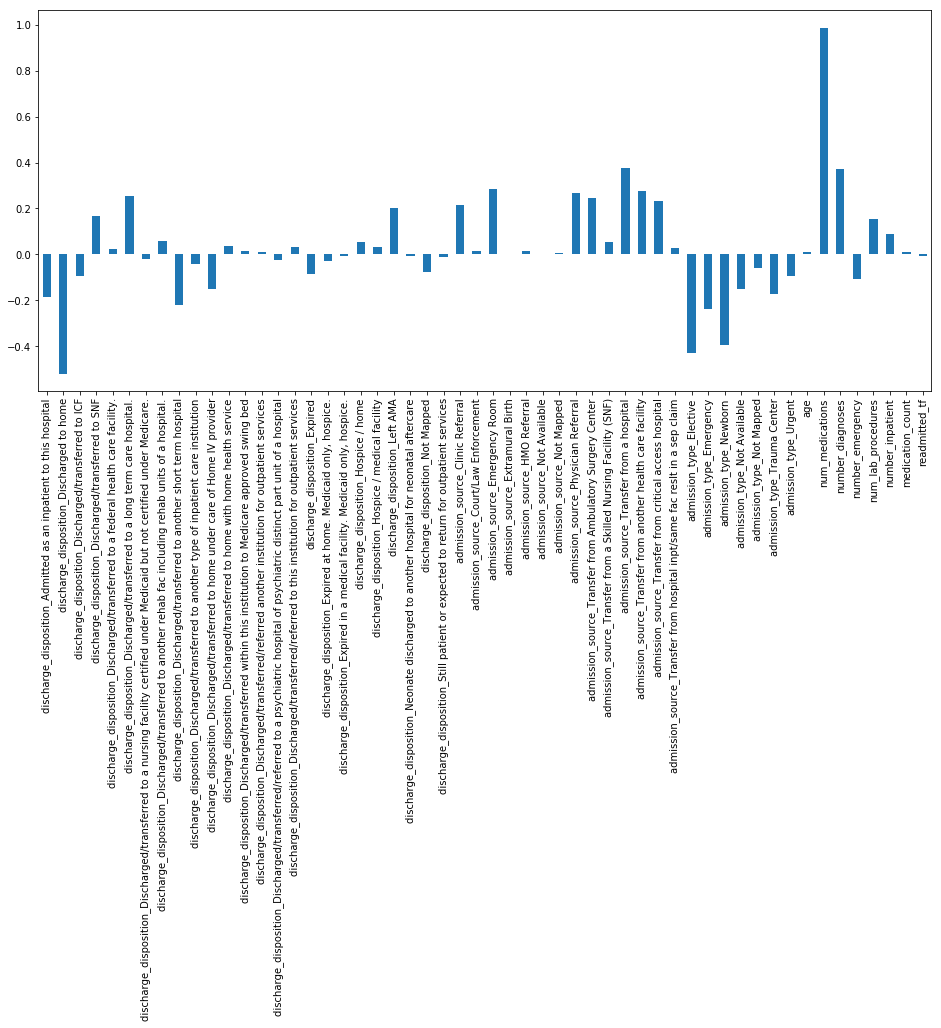

In [34]:
pd.Series(linearRegressor.coef_[0].T, index = X_train.columns).plot(kind = 'bar', figsize=(16,7))
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yPrediction)

#MSE with draft features and no parameters tuning:
#7.175072072572132

3.017756062464365e+20

ValueError: x and y must be the same size

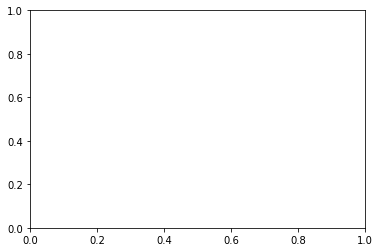

In [17]:
import matplotlib.pyplot as plot

plot.scatter(X_train_scaled, y_train, color = 'red')
plot.plot(X_train_scaled, linearRegressor.predict(X_train_scaled), color = 'blue')
plot.title('time_in_hospital regression (Training set)')
plot.xlabel('')
plot.ylabel('time_in_hospital')
plot.show()

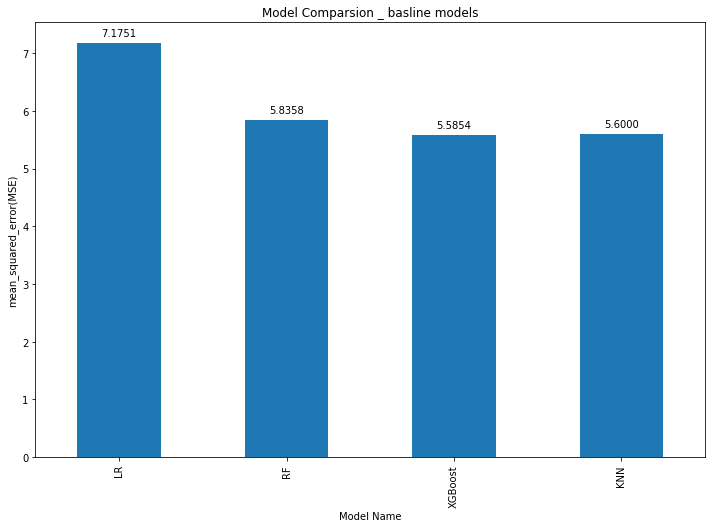

In [18]:
#histogram to compare MSE of models
# LR 7.175072072572132
#KNN ?? say 5.6

# XGBoost_reg - mean_squared_error:  5.585353165243333
#       RF_reg - mean_squared_error: 5.835765214548177


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
ModelMSEs = [7.175072072572132, 5.835765214548177, 5.585353165243333, 5.6]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series.from_array(ModelMSEs)

x_labels = ["LR","RF","XGBoost","KNN"]

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Model Comparsion _ basline models')
ax.set_xlabel('Model Name')
ax.set_ylabel('mean_squared_error(MSE)')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.4f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)